In [1]:
import torch
import pandas as pd
import numpy as np
from lib.churn_prediction import ChurnPrediction

In [2]:
df_all_data = pd.read_csv('D:\data\churn_prediction//Churn_Modelling.csv')
churn_prediction = ChurnPrediction(df_all_data, is_display_detail = False)

ChartVisualizer object created
ChurnPrediction object created


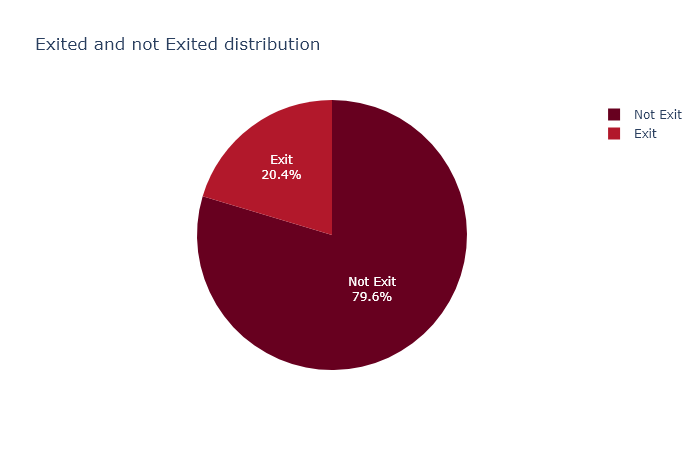

The dataset contain 10000 data and only 20.4% data is 'Exit'


In [3]:
churn_prediction.show_label_distribution()
print(f"The dataset contain {churn_prediction._NNDataP.df_all_data.shape[0]} data and only 20.4% data is 'Exit'")

In [4]:
churn_prediction.show_tuning_combinations()

num of combination: 32


,optimizer_attr,lr,amsgrad,batch_size,shuffle,class_weight,dropout_percent,list_layers_input_size
0,Adam,0.02,False,1000,True,None,0.4,"[200, 100, 50]"
1,Adam,0.02,False,1000,True,None,0.4,"[30, 10]"
2,Adam,0.02,False,1000,True,"[tensor(0.8000), tensor(1.)]",0.4,"[200, 100, 50]"
3,Adam,0.02,False,1000,True,"[tensor(0.8000), tensor(1.)]",0.4,"[30, 10]"
4,Adam,0.02,False,1000,False,None,0.4,"[200, 100, 50]"
5,Adam,0.02,False,1000,False,None,0.4,"[30, 10]"
6,Adam,0.02,False,1000,False,"[tensor(0.8000), tensor(1.)]",0.4,"[200, 100, 50]"
7,Adam,0.02,False,1000,False,"[tensor(0.8000), tensor(1.)]",0.4,"[30, 10]"
8,Adam,0.02,True,1000,True,None,0.4,"[200, 100, 50]"
9,Adam,0.02,True,1000,True,None,0.4,"[30, 10]"


In [5]:
churn_prediction.cross_validate(num_max_epochs = 150, patience = 15, is_log_in_tsboard = True)

NNModel object created
train and valid model:  _dropout_p_0.4_layers_size_[200,100,50]_opt_Adam_lr_0.02_amsgrad_False_no_cw_bs_1000_shuffle_True
ChurnPredictionDataset object created
ChurnPredictionDataset object created
EarlyStopping object created
Early stopping at 49
NNModel object created
train and valid model:  _dropout_p_0.4_layers_size_[200,100,50]_opt_Adam_lr_0.02_amsgrad_False_no_cw_bs_1000_shuffle_True
ChurnPredictionDataset object created
ChurnPredictionDataset object created
EarlyStopping object created
Early stopping at 33
NNModel object created
train and valid model:  _dropout_p_0.4_layers_size_[200,100,50]_opt_Adam_lr_0.02_amsgrad_False_no_cw_bs_1000_shuffle_True
ChurnPredictionDataset object created
ChurnPredictionDataset object created
EarlyStopping object created
Early stopping at 37
NNModel object created
train and valid model:  _dropout_p_0.4_layers_size_[200,100,50]_opt_Adam_lr_0.02_amsgrad_False_no_cw_bs_1000_shuffle_True
ChurnPredictionDataset object created
Chur

Early stopping at 70
NNModel object created
train and valid model:  _dropout_p_0.4_layers_size_[200,100,50]_opt_Adam_lr_0.02_amsgrad_False_cw_0.80_1.00_bs_1000_shuffle_False
ChurnPredictionDataset object created
ChurnPredictionDataset object created
EarlyStopping object created
Early stopping at 29
NNModel object created
train and valid model:  _dropout_p_0.4_layers_size_[200,100,50]_opt_Adam_lr_0.02_amsgrad_False_cw_0.80_1.00_bs_1000_shuffle_False
ChurnPredictionDataset object created
ChurnPredictionDataset object created
EarlyStopping object created
Early stopping at 43
NNModel object created
train and valid model:  _dropout_p_0.4_layers_size_[200,100,50]_opt_Adam_lr_0.02_amsgrad_False_cw_0.80_1.00_bs_1000_shuffle_False
ChurnPredictionDataset object created
ChurnPredictionDataset object created
EarlyStopping object created
Early stopping at 45
NNModel object created
train and valid model:  _dropout_p_0.4_layers_size_[200,100,50]_opt_Adam_lr_0.02_amsgrad_False_cw_0.80_1.00_bs_1000_shu

Early stopping at 32
NNModel object created
train and valid model:  _dropout_p_0.4_layers_size_[200,100,50]_opt_Adam_lr_0.02_amsgrad_True_no_cw_bs_1000_shuffle_False
ChurnPredictionDataset object created
ChurnPredictionDataset object created
EarlyStopping object created
Early stopping at 30
NNModel object created
train and valid model:  _dropout_p_0.4_layers_size_[200,100,50]_opt_Adam_lr_0.02_amsgrad_True_no_cw_bs_1000_shuffle_False
ChurnPredictionDataset object created
ChurnPredictionDataset object created
EarlyStopping object created
Early stopping at 41
NNModel object created
train and valid model:  _dropout_p_0.4_layers_size_[200,100,50]_opt_Adam_lr_0.02_amsgrad_True_no_cw_bs_1000_shuffle_False
ChurnPredictionDataset object created
ChurnPredictionDataset object created
EarlyStopping object created
Early stopping at 34
NNModel object created
train and valid model:  _dropout_p_0.4_layers_size_[30,10]_opt_Adam_lr_0.02_amsgrad_True_no_cw_bs_1000_shuffle_False
ChurnPredictionDataset obj

Early stopping at 31
NNModel object created
train and valid model:  _dropout_p_0.4_layers_size_[200,100,50]_opt_AdamW_lr_0.02_amsgrad_False_cw_0.80_1.00_bs_1000_shuffle_True
ChurnPredictionDataset object created
ChurnPredictionDataset object created
EarlyStopping object created
Early stopping at 39
NNModel object created
train and valid model:  _dropout_p_0.4_layers_size_[200,100,50]_opt_AdamW_lr_0.02_amsgrad_False_cw_0.80_1.00_bs_1000_shuffle_True
ChurnPredictionDataset object created
ChurnPredictionDataset object created
EarlyStopping object created
Early stopping at 29
NNModel object created
train and valid model:  _dropout_p_0.4_layers_size_[30,10]_opt_AdamW_lr_0.02_amsgrad_False_cw_0.80_1.00_bs_1000_shuffle_True
ChurnPredictionDataset object created
ChurnPredictionDataset object created
EarlyStopping object created
Early stopping at 34
NNModel object created
train and valid model:  _dropout_p_0.4_layers_size_[30,10]_opt_AdamW_lr_0.02_amsgrad_False_cw_0.80_1.00_bs_1000_shuffle_True

Early stopping at 36
NNModel object created
train and valid model:  _dropout_p_0.4_layers_size_[200,100,50]_opt_AdamW_lr_0.02_amsgrad_True_no_cw_bs_1000_shuffle_True
ChurnPredictionDataset object created
ChurnPredictionDataset object created
EarlyStopping object created
Early stopping at 55
NNModel object created
train and valid model:  _dropout_p_0.4_layers_size_[200,100,50]_opt_AdamW_lr_0.02_amsgrad_True_no_cw_bs_1000_shuffle_True
ChurnPredictionDataset object created
ChurnPredictionDataset object created
EarlyStopping object created
Early stopping at 76
NNModel object created
train and valid model:  _dropout_p_0.4_layers_size_[30,10]_opt_AdamW_lr_0.02_amsgrad_True_no_cw_bs_1000_shuffle_True
ChurnPredictionDataset object created
ChurnPredictionDataset object created
EarlyStopping object created
Early stopping at 27
NNModel object created
train and valid model:  _dropout_p_0.4_layers_size_[30,10]_opt_AdamW_lr_0.02_amsgrad_True_no_cw_bs_1000_shuffle_True
ChurnPredictionDataset object c

Early stopping at 56
NNModel object created
train and valid model:  _dropout_p_0.4_layers_size_[200,100,50]_opt_AdamW_lr_0.02_amsgrad_True_cw_0.80_1.00_bs_1000_shuffle_False
ChurnPredictionDataset object created
ChurnPredictionDataset object created
EarlyStopping object created
Early stopping at 38
NNModel object created
train and valid model:  _dropout_p_0.4_layers_size_[30,10]_opt_AdamW_lr_0.02_amsgrad_True_cw_0.80_1.00_bs_1000_shuffle_False
ChurnPredictionDataset object created
ChurnPredictionDataset object created
EarlyStopping object created
Early stopping at 59
NNModel object created
train and valid model:  _dropout_p_0.4_layers_size_[30,10]_opt_AdamW_lr_0.02_amsgrad_True_cw_0.80_1.00_bs_1000_shuffle_False
ChurnPredictionDataset object created
ChurnPredictionDataset object created
EarlyStopping object created
Early stopping at 37
NNModel object created
train and valid model:  _dropout_p_0.4_layers_size_[30,10]_opt_AdamW_lr_0.02_amsgrad_True_cw_0.80_1.00_bs_1000_shuffle_False
Chur

In [6]:
churn_prediction.df_cv_performance

,optimizer_attr,lr,amsgrad,batch_size,shuffle,class_weight,dropout_percent,list_layers_input_size,list_cv_loss,list_mean_cv_loss,list_std_cv_loss,model_index,best_cv_index
0,Adam,0.02,False,1000,True,None,0.4,"[200, 100, 50]","[0.3372061550617218, 0.32500676810741425, 0.35...",0.334718,0.010805,0,1
16,AdamW,0.02,False,1000,True,None,0.4,"[200, 100, 50]","[0.3375512808561325, 0.3302415460348129, 0.354...",0.334801,0.011387,16,4
8,Adam,0.02,True,1000,True,None,0.4,"[200, 100, 50]","[0.3347155302762985, 0.3291042894124985, 0.356...",0.335705,0.012091,8,4
24,AdamW,0.02,True,1000,True,None,0.4,"[200, 100, 50]","[0.34126095473766327, 0.3287820518016815, 0.35...",0.336800,0.010884,24,4
28,AdamW,0.02,True,1000,False,None,0.4,"[200, 100, 50]","[0.3371414840221405, 0.32081617414951324, 0.35...",0.338200,0.013746,28,1
20,AdamW,0.02,False,1000,False,None,0.4,"[200, 100, 50]","[0.337236225605011, 0.32108843326568604, 0.362...",0.338568,0.015492,20,1
5,Adam,0.02,False,1000,False,None,0.4,"[30, 10]","[0.3332321047782898, 0.3222571760416031, 0.362...",0.338837,0.013826,5,1
9,Adam,0.02,True,1000,True,None,0.4,"[30, 10]","[0.34379148483276367, 0.3272576779127121, 0.35...",0.338902,0.009164,9,1
1,Adam,0.02,False,1000,True,None,0.4,"[30, 10]","[0.341945081949234, 0.3268645405769348, 0.3570...",0.339022,0.010248,1,1
17,AdamW,0.02,False,1000,True,None,0.4,"[30, 10]","[0.3434772342443466, 0.3368043303489685, 0.354...",0.339217,0.008965,17,4


# Classification report

In [7]:
churn_prediction.test_model(dataset = 'test_set')
churn_prediction.show_classification_report(dataset = 'test_set')

ChurnPredictionDataset object created
Classification report:


,precision,recall,f1-score,support
Not exited,0.873511,0.966729,0.917759,1593.000
Exited,0.776371,0.452088,0.571429,407.000
accuracy,0.862000,0.862000,0.862000,0.862
macro avg,0.824941,0.709409,0.744594,2000.000
weighted avg,0.853743,0.862000,0.847281,2000.000


In [8]:
churn_prediction.test_model(dataset = 'train_set')
churn_prediction.show_classification_report(dataset = 'train_set')

ChurnPredictionDataset object created
Classification report:


,precision,recall,f1-score,support
Not exited,0.873112,0.964089,0.916348,5096.000000
Exited,0.763260,0.452454,0.568127,1304.000000
accuracy,0.859844,0.859844,0.859844,0.859844
macro avg,0.818186,0.708272,0.742238,6400.000000
weighted avg,0.850729,0.859844,0.845398,6400.000000
